# Basics

## Numpy

You will now play around with some basics of tensor manipulation in numpy. The basic object in numpy is a homogeneous multidimensional array. Numpy's array class is called `ndarray`. Checkout the [quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html).

First, we import the numpy package.

In [1]:
import numpy as np


Let’s create two matrices and check their properties.

In [2]:
A = np.array(np.arange(6))
B = np.array([-1, 3])
print(f"A (shape: {A.shape}, type: {type(A)}) = {A}")
print(f"B (shape: {B.shape}, type: {type(B)}) = {B}")


A (shape: (6,), type: <class 'numpy.ndarray'>) = [0 1 2 3 4 5]
B (shape: (2,), type: <class 'numpy.ndarray'>) = [-1  3]


**Explanation:** First, 2 arrays (also called tensors) are created. Each numpy tensor has an attribute `numpy.ndarray.shape` which describes the dimensions of the defined tensor. Type, shape and content of the tensors are the first output of the script.

Please note how we are using [f-strings](https://realpython.com/python-f-strings/#f-strings-a-new-and-improved-way-to-format-strings-in-python) to output variables.

Next, we try to multiply the two tensors with [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html). The dimensions of the matrices are incompatible, so we get an error.

In [3]:
print(f"A={A}\nB={B}\n")
try:
    np.matmul(A, B)
except ValueError as e:
    print(f"Operation failed: {e}")


A=[0 1 2 3 4 5]
B=[-1  3]

Operation failed: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 6)


We get a *ValueError* due to the shape mismatch between the two numpy arrays we want to multiply. 

In order to deal with different array shapes during arithmetic operations, we can either [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) the arrays or [broadcast](https://docs.scipy.org/doc/numpy/user/theory.broadcasting.html#array-broadcasting-in-numpy) the smaller array across the larger one such that they have compatible shapes.

In [4]:
C = A.reshape([3, 2])
print(f"C={C}\nshape: {C.shape}")


C=[[0 1]
 [2 3]
 [4 5]]
shape: (3, 2)


Now the matrix multiplication $CB$ works out.

In [5]:
print(f"C={C}\nB={B}\n")
matmul_result = np.matmul(C, B)
print(matmul_result)


C=[[0 1]
 [2 3]
 [4 5]]
B=[-1  3]

[ 3  7 11]


Let's do matrix addition with [np.add](https://numpy.org/doc/stable/reference/generated/numpy.add.html) which can also be done by using `+`. 
When adding $C$ with shape $(3,2)$ and $B$ with shape $(2,)$, $B$ will be automatically broadcast to match the shape of $C$ by repeating it over 3 rows to $(3,2)$

In [6]:
print(C + B)


[[-1  4]
 [ 1  6]
 [ 3  8]]


The star operator $*$ will do an element-wise multiplication ([np.multiply](https://numpy.org/doc/stable/reference/generated/numpy.multiply.html)) between $C$ and $B$. Again, $B$ will be broadcasted to fit.

In [7]:
print(C * B)


[[ 0  3]
 [-2  9]
 [-4 15]]


The function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) can transform the vector $B$ shaped $(2,)$ into a diagonal matrix of shape $(2,2)$

In [8]:
print(f"B={B}\n")
print(np.diag(B))


B=[-1  3]

[[-1  0]
 [ 0  3]]


For transposing a ndarray use [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) or `my_array.T`

In [9]:
print(f"C={C}\n")
print(np.transpose(C))


C=[[0 1]
 [2 3]
 [4 5]]

[[0 2 4]
 [1 3 5]]


[Indexing operations](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing) are used to select parts of the tensor.

In [10]:
print(f"C={C}\n")
print(C[0])  # select row 0
print(C[0, 0])  # select row 0, column 0
print(C[:, 0])  # select all rows, column 0


C=[[0 1]
 [2 3]
 [4 5]]

[0 1]
0
[0 2 4]


Tensor operations are a central part of the exercises.
Play around with the notebook to get familiar with them.

**Note:** For-loops in python are usually too slow, use vectorized numpy expressions instead.

**Slow** sum in python:

In [11]:
%%timeit -r 1 -n 1
total = 0
for i in range(1000000):
    total += i ** 2


57.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Fast** sum by letting numpy do the math. Note that we need the datatype `np.int64` to use integers that are large enough to store the result. The square and sum operations are vectorized and run in fast C code internally.

In [12]:
%%timeit -r 1 -n 1
numbers = np.arange(1000000, dtype=np.int64)
total = (numbers ** 2).sum()


5.04 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Plotting

In the exercises you will use [matplotlib](https://matplotlib.org/) to visualize data.

Let's create some gaussian random data first:

In [13]:
data_2d = np.random.randn(1000, 2)


We created a tensor with 1000 rows for our datapoints and 2 columns for an x- and y-axis position. Now we can plot it:

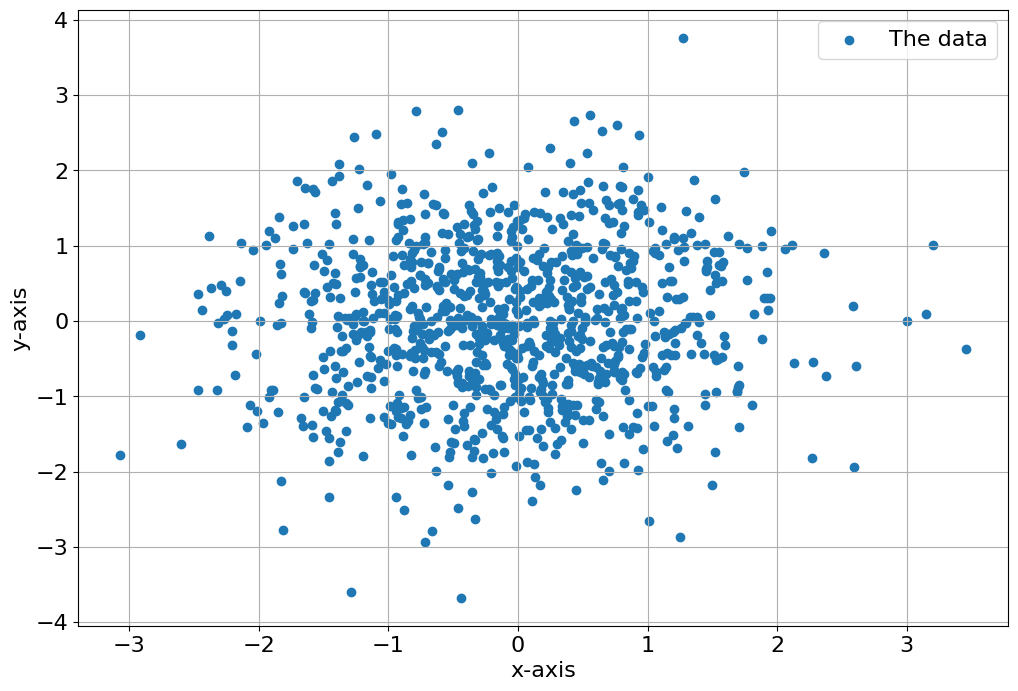

In [14]:
from matplotlib import pyplot as plt

# increase the font size for all plots in the notebook
plt.rc('font', size=16)

# create a figure that is bigger than the default size
plt.figure(figsize=(12,8))

# create the scatterplot
plt.scatter(data_2d[:, 0], data_2d[:, 1], label="The data")

# set axis labels
plt.xlabel("x-axis")
plt.ylabel("y-axis")

# display a grid and legend
plt.grid()
plt.legend()

# show the plot
plt.show()


Instead of a scatter plot, we can also do a line plot:

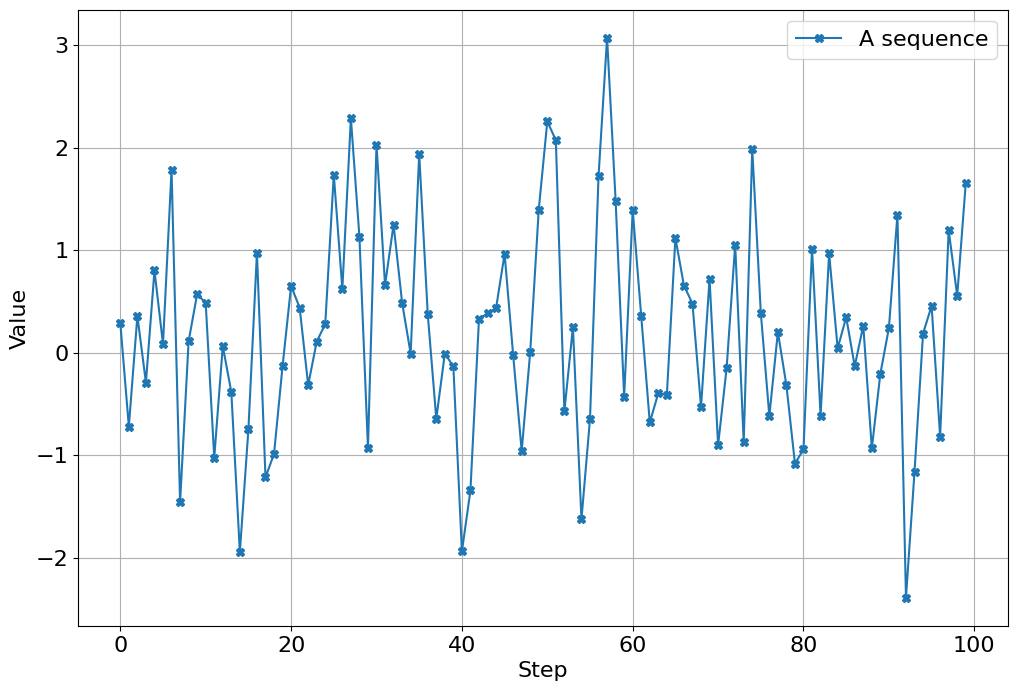

In [15]:
x = np.arange(100)
y = np.random.randn(100)

plt.figure(figsize=(12,8))
plt.plot(x, y, "X-", label="A sequence")
plt.xlabel("Step")
plt.ylabel("Value")
plt.grid()
plt.legend()
plt.show()
